<H2> OBJECTIVE: OPTIMIZING SALES PERFORMANCE BY IDENTIFYING KEY DRIVERS OF REVENUE

<H4> Research Questions:
<H4> 1. What is the overall sales trend?
<H4> 2. What are the top selling products?
<H4> 3. what are the preferred shipping modes?
<H4> 4. Who are the most valuable customers?

In [1]:
# Importing Required Libraries

# For data manipulation
import pandas as pd 
import numpy as np

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importing the Dataset
df = pd.read_excel("superstore_sales.xlsx")

<H2> Sanity Check of the data

In [3]:
# First five rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Last Five rows of the dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
# Shape of the dataset
df.shape

(51290, 21)

In [6]:
#Checking columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
# Check for missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [38]:
# Get a summary of descriptive statistics
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


<H2> Exploratory Data Analysis

<H5> 1. What is the overall sales trend?

In [32]:
# Fetching Month and year from data

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month and year
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

# Group by 'month_year' and sum 'sales'
sales_trend = df.groupby('month_year')['sales'].sum().reset_index()
print(sales_trend)


   month_year         sales
0     2011-01   98898.48886
1     2011-02   91152.15698
2     2011-03  145729.36736
3     2011-04  116915.76418
4     2011-05  146747.83610
5     2011-06  215207.38022
6     2011-07  115510.41912
7     2011-08  207581.49122
8     2011-09  290214.45534
9     2011-10  199071.26404
10    2011-11  298496.53752
11    2011-12  333925.73460
12    2012-01  135780.72024
13    2012-02  100510.21698
14    2012-03  163076.77116
15    2012-04  161052.26952
16    2012-05  208364.89124
17    2012-06  256175.69842
18    2012-07  145236.78512
19    2012-08  303142.94238
20    2012-09  289389.16564
21    2012-10  252939.85020
22    2012-11  323512.41690
23    2012-12  338256.96660
24    2013-01  199185.90738
25    2013-02  167239.65040
26    2013-03  198594.03012
27    2013-04  177821.31684
28    2013-05  260498.56470
29    2013-06  396519.61190
30    2013-07  229928.95200
31    2013-08  326488.78936
32    2013-09  376619.24568
33    2013-10  293406.64288
34    2013-11  37398

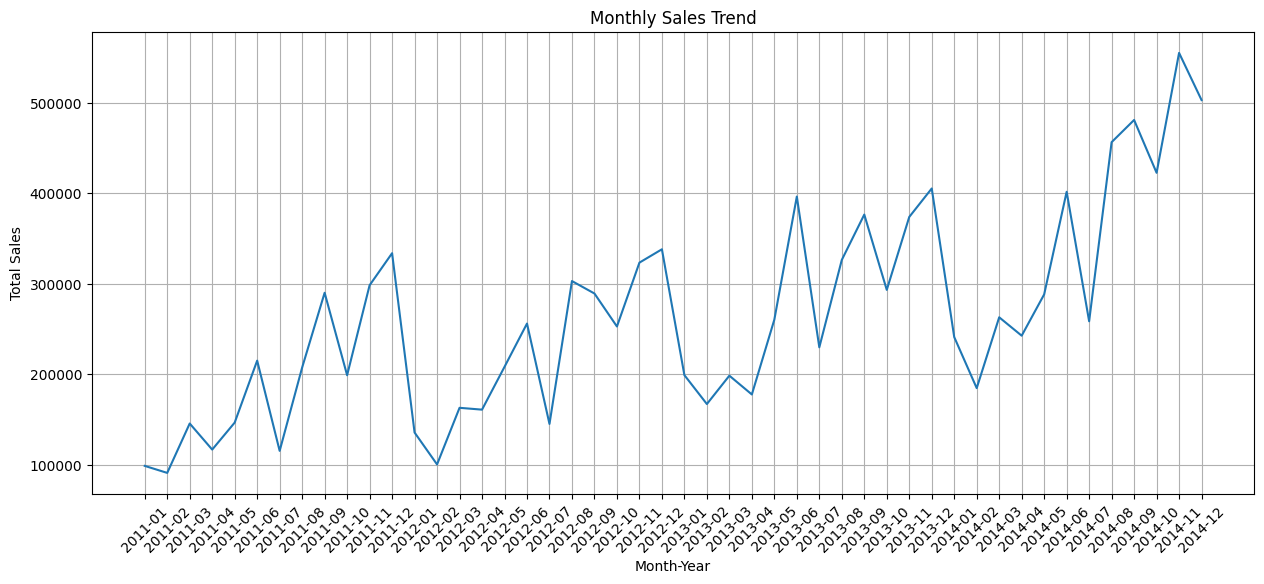

In [16]:
# Plotting the trend
plt.figure(figsize=(15,6))
plt.plot(sales_trend["month_year"], sales_trend["sales"])
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<H4> 2. What are the top selling products?

<H4> a. Top 10 by sells

In [40]:
# Grouping Products by Name
prod_sales = pd.DataFrame(df.groupby("product_name")["sales"].sum())

# Sorting product sales column
prod_sales = prod_sales.sort_values("sales",ascending=False).head(10)
print(prod_sales)

                                                         sales
product_name                                                  
Apple Smart Phone, Full Size                        86935.7786
Cisco Smart Phone, Full Size                        76441.5306
Motorola Smart Phone, Full Size                     73156.3030
Nokia Smart Phone, Full Size                        71904.5555
Canon imageCLASS 2200 Advanced Copier               61599.8240
Hon Executive Leather Armchair, Adjustable          58193.4841
Office Star Executive Leather Armchair, Adjustable  50661.6840
Harbour Creations Executive Leather Armchair, A...  50121.5160
Samsung Smart Phone, Cordless                       48653.4600
Nokia Smart Phone, with Caller ID                   47877.7857


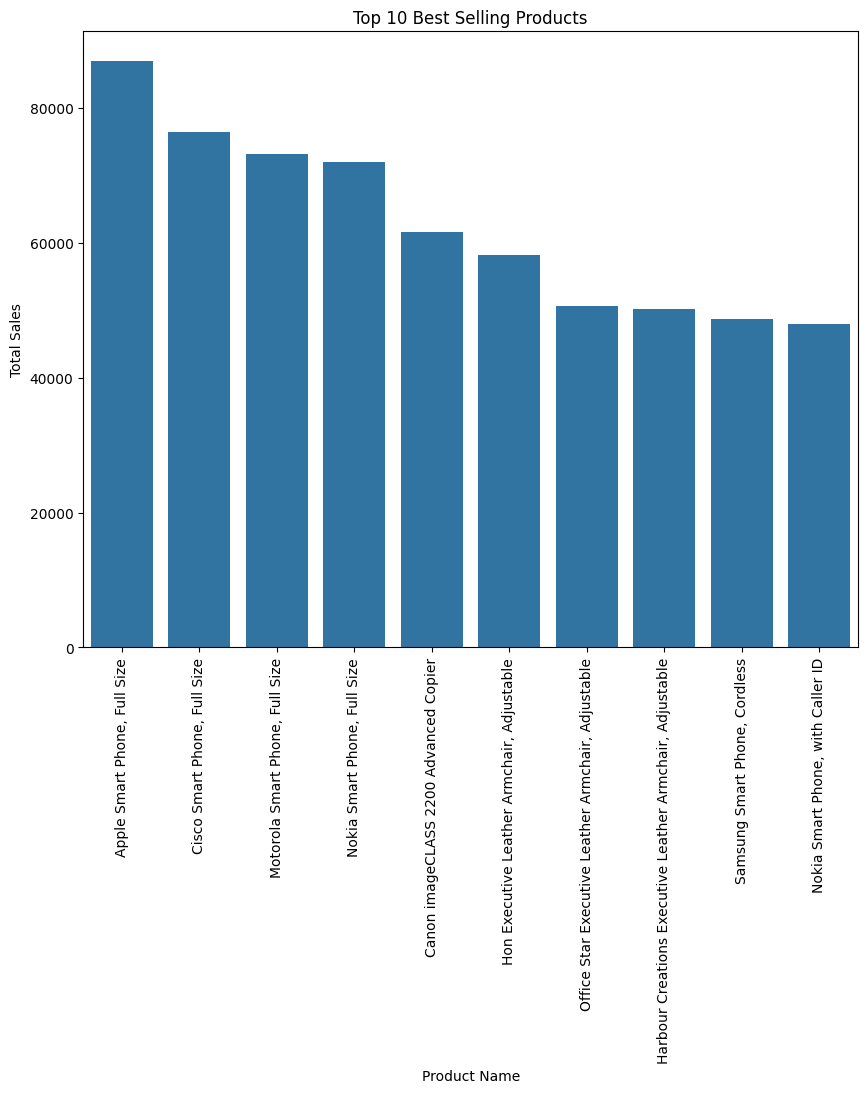

In [25]:
# Plotting Best selling Products Graph
plt.figure(figsize=(10,8))
sns.barplot(x=prod_sales.index, y='sales', data=prod_sales)
plt.title("Top 10 Best Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

<H4> b. Top 10 by Quantity

In [42]:
# Grouping Products by Name
prod_quant = pd.DataFrame(df.groupby("product_name")["quantity"].sum())

# Sorting product quantities column
prod_quant = prod_quant.sort_values("quantity",ascending=False).head(10)
print(prod_quant)

                                       quantity
product_name                                   
Staples                                     876
Cardinal Index Tab, Clear                   337
Eldon File Cart, Single Width               321
Rogers File Cart, Single Width              262
Sanford Pencil Sharpener, Water Color       259
Stockwell Paper Clips, Assorted Sizes       253
Avery Index Tab, Clear                      252
Ibico Index Tab, Clear                      251
Smead File Cart, Single Width               250
Stanley Pencil Sharpener, Water Color       242


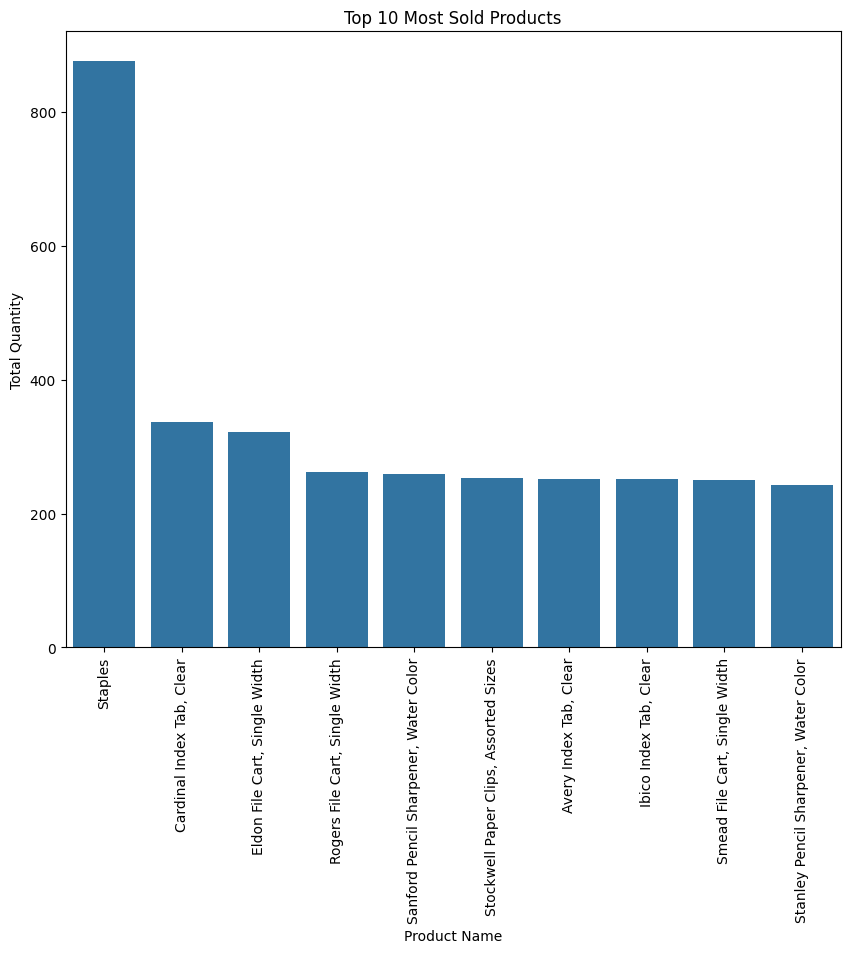

In [29]:
# Plotting Best selling Products Graph
plt.figure(figsize=(10,8))
sns.barplot(x=prod_quant.index, y='quantity', data=prod_quant)
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity")
plt.xticks(rotation=90)
plt.show()

<H4> 3. what are the preferred shipping modes? 

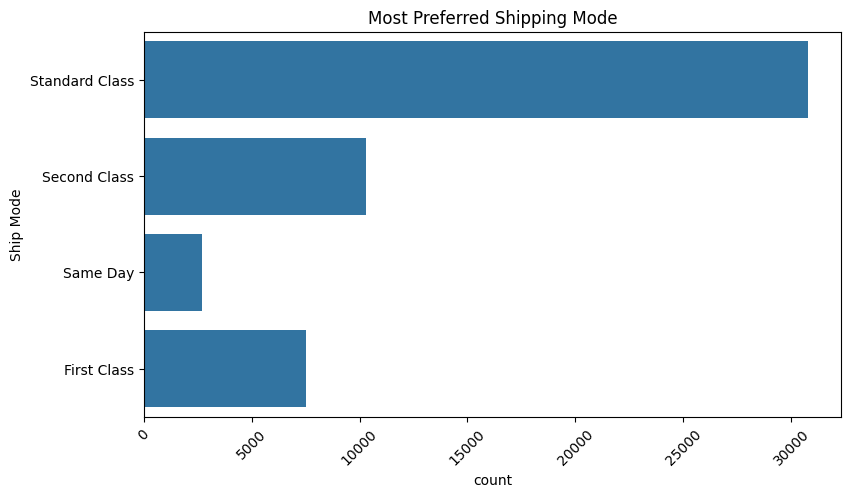

In [34]:
#Count of the Number of Ship Modes Present in the Data
plt.figure(figsize =(9,5))
sns.countplot(df["ship_mode"])
plt.title('Most Preferred Shipping Mode')
plt.ylabel('Ship Mode')
plt.xticks(rotation=45)
plt.show()

<H4> 4. Who are the most valuable customers?

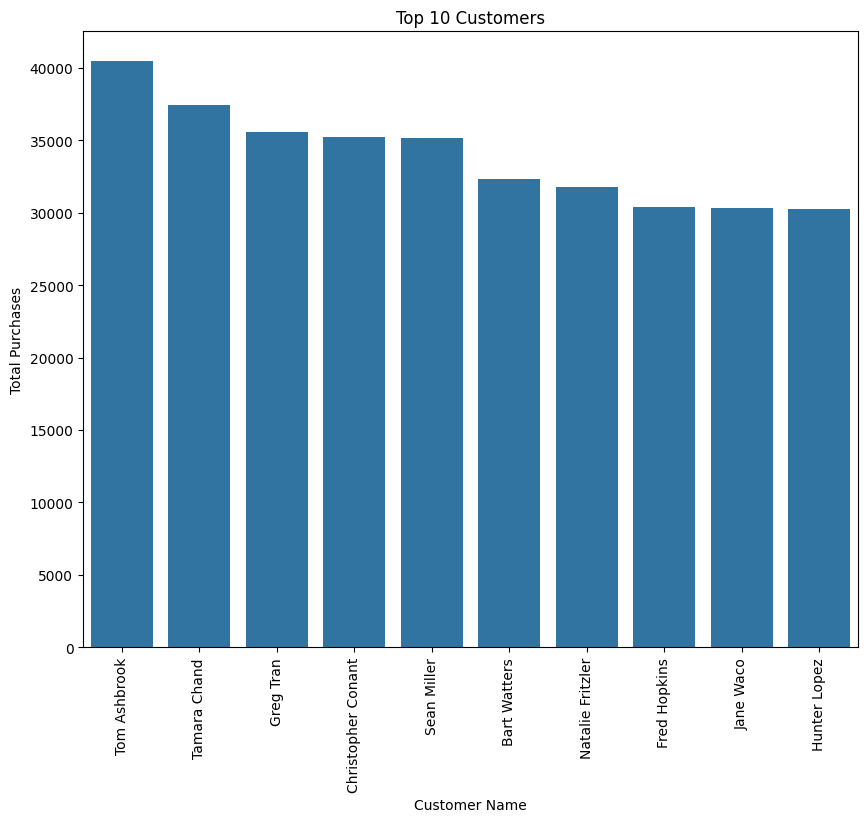

In [37]:
# Grouping Top Customers by Name
top_customers = pd.DataFrame(df.groupby("customer_name")["sales"].sum())

# Sorting top Customers Column
top_customers = top_customers.sort_values("sales",ascending=False).head(10)

# Ploting the sales revenue form the top 10 customers
plt.figure(figsize=(10,8))
sns.barplot(x=top_customers.index, y='sales', data=top_customers)
plt.title("Top 10 Customers")
plt.xlabel("Customer Name")
plt.ylabel("Total Purchases")
plt.xticks(rotation=90)
plt.show()

<H2> Results:

- <H4> There consistent upward trend suggesting that there has been steady growth in sales over the observed period.
Notably there is also some cyclic variation particularly in the first quarters which typicallly sees lower sales followed by a gradual increase; observe the month(S) of janauary.

- <H4> The best selling product by amount is Apple Smart Phone, Full Size with $86935.7786 total revenues generated
while the best selling product by quantity is Staples with 876 items sold

- <h4> Standard class is the most preferred shipping mode with over 50% of oders using it for delivery.

- <h4> Tom Ashbrook is the stores top customer making over $40,000 puchases from the store in three years

<H2> Recommendation:

- <h4> Conduct a time series analysis to forecats the sales patterns for the future periods and adjust strategies accordingly.

- <h4> Find out why Same day delivary mode of shipping performs poorly. 

- <h4> Reward your most valuable customers